In [37]:
import  numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt

In [115]:
df=pd.read_csv('sample_data2.csv')
df
                

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
5,4,Professor,25000.0,Bachelors,5
6,7,Business Analyst,18000.0,NaN,5
7,8,UX/UI Developer,23.0,Bachelors,0
8,9,Devops Engineer,NaN,Masters,2


In [116]:
df.head()

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1


In [117]:
df.isnull().sum()

Serial Number    0
Title            0
Salary           1
Qualification    1
Exp              0
dtype: int64

In [118]:
##.dropna(inplace=True)

In [119]:
df.Salary.median()

19000.0

In [120]:
df.Qualification.mode()

0    Bachelors
Name: Qualification, dtype: object

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  9 non-null      int64  
 1   Title          9 non-null      object 
 2   Salary         8 non-null      float64
 3   Qualification  8 non-null      object 
 4   Exp            9 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 492.0+ bytes


In [122]:
df.fillna({'Salary':df.Salary.median(),'Qualification':df.Qualification.mode()[0]},inplace=True)


In [123]:
df.isnull().sum()

Serial Number    0
Title            0
Salary           0
Qualification    0
Exp              0
dtype: int64

In [124]:
df.duplicated().sum()

np.int64(1)

In [125]:
df[df.duplicated()]

,Serial Number,Title,Salary,Qualification,Exp
5,4,Professor,25000.0,Bachelors,5


In [126]:
df.drop_duplicates(inplace=True,ignore_index=True)


In [127]:
df.duplicated().sum()

np.int64(0)

In [51]:
df=pd.read_csv('Housing_data.csv')

In [52]:
df.shape

(1047, 7)

In [53]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [55]:
df.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(12)

In [57]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [58]:
df.duplicated().sum()

np.int64(0)

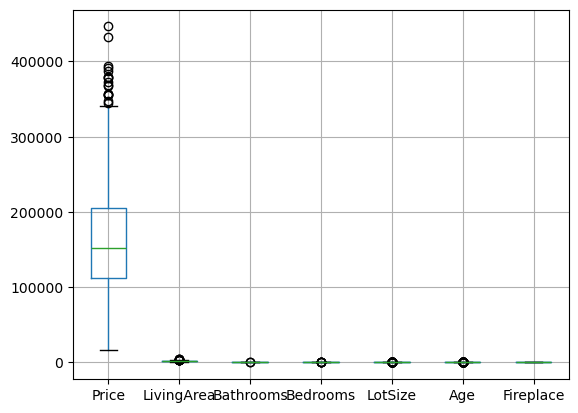

In [59]:
###checking outlayers
df.boxplot()
plt.show()

In [64]:
###out layer capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
    

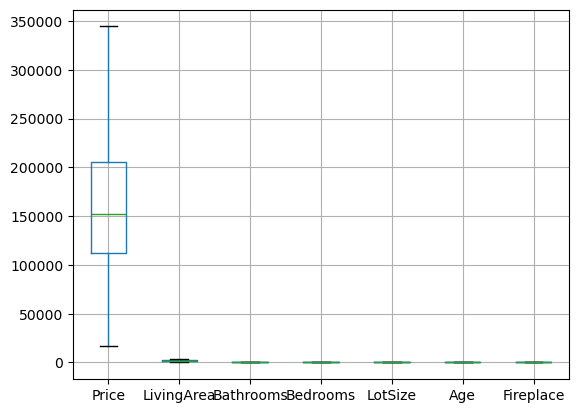

In [65]:
df.boxplot()
plt.show()

In [68]:
import seaborn as sns

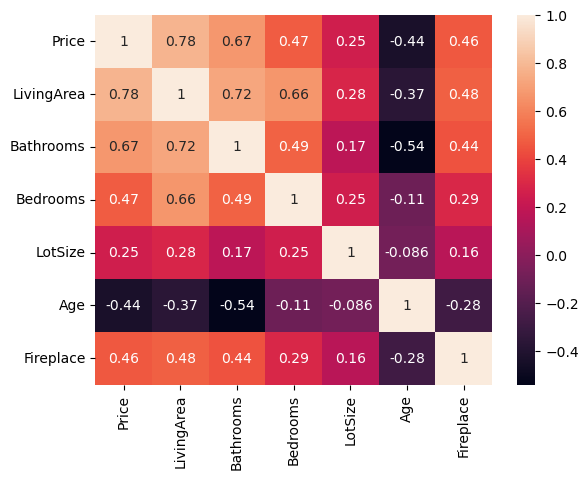

In [69]:
###feature selection
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [74]:
####multicolineraity 
####variance_ind=flation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
y=df[['Price']]
x=df.drop(columns=['Price'])

In [77]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
x.values

array([[1.629e+03, 1.000e+00, 3.000e+00, 7.600e-01, 7.525e+01, 0.000e+00],
       [1.344e+03, 2.000e+00, 3.000e+00, 9.200e-01, 1.300e+01, 0.000e+00],
       [8.220e+02, 1.000e+00, 2.000e+00, 5.600e-01, 7.525e+01, 0.000e+00],
       ...,
       [3.361e+03, 3.500e+00, 4.000e+00, 7.100e-01, 1.000e+00, 1.000e+00],
       [3.250e+03, 2.500e+00, 3.000e+00, 5.300e-01, 2.300e+01, 1.000e+00],
       [3.467e+03, 2.500e+00, 4.000e+00, 3.400e-01, 3.000e+00, 1.000e+00]])

In [79]:
vif.sort_values(by='vif',ascending=True)

,features,vif
4,Age,2.471556
5,Fireplace,3.304989
3,LotSize,3.345417
1,Bathrooms,21.617158
0,LivingArea,28.393716
2,Bedrooms,29.100456


In [82]:
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')

In [83]:
f_reg=f_regression(x,y)

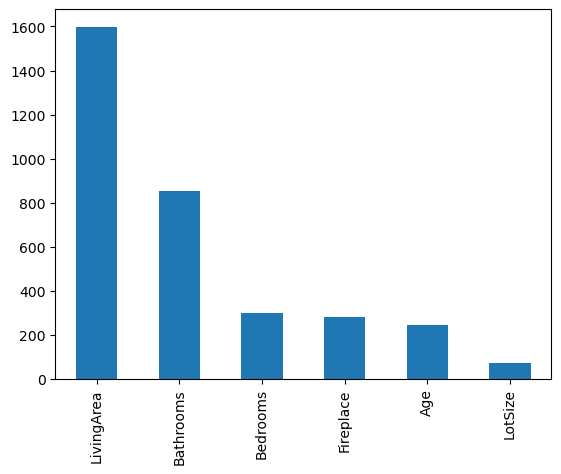

In [85]:
pd.Series(f_reg[0],index=x.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [86]:
##scaling and labeling

In [90]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder


In [99]:
std_sca=StandardScaler()
rob_sca=RobustScaler()

In [100]:
x.head()

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629.0,1.0,3.0,0.76,75.25,0
1,1344.0,2.0,3.0,0.92,13.00,0
2,822.0,1.0,2.0,0.56,75.25,0
3,1540.0,1.0,2.0,0.04,75.25,0
4,1320.0,1.0,3.0,0.17,75.25,0


In [108]:
x[['LivingArea','LotSize','Age']]=std_sca.fit_transform(x[['LivingArea','LotSize','Age']])


In [110]:
x.head()

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,-0.277590,1.0,3.0,0.937235,2.258368,0
1,-0.730058,2.0,3.0,1.437239,-0.488931,0
2,-1.558790,1.0,2.0,0.312231,2.258368,0
3,-0.418887,1.0,2.0,-1.312782,2.258368,0
4,-0.768161,1.0,3.0,-0.906529,2.258368,0


In [105]:
rob_sca.fit_transform(x[['LivingArea','LotSize','Age']])

array([[-0.05072046,  0.94871795,  2.08181818],
       [-0.37925072,  1.35897436, -0.18181818],
       [-0.98097983,  0.43589744,  2.08181818],
       ...,
       [ 1.94582133,  0.82051282, -0.61818182],
       [ 1.81786744,  0.35897436,  0.18181818],
       [ 2.06801153, -0.12820513, -0.54545455]])

In [111]:
####labeling

In [112]:
df

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858.00,1629.0,1.0,3.0,0.76,75.25,0
1,26049.00,1344.0,2.0,3.0,0.92,13.00,0
2,26130.00,822.0,1.0,2.0,0.56,75.25,0
3,31113.00,1540.0,1.0,2.0,0.04,75.25,0
4,40932.00,1320.0,1.0,3.0,0.17,75.25,0
...,...,...,...,...,...,...,...
1030,344449.25,3504.0,2.5,5.0,0.90,0.00,1
1031,344449.25,3003.0,3.5,4.0,0.46,75.25,1
1032,344449.25,3361.0,3.5,4.0,0.71,1.00,1
1033,344449.25,3250.0,2.5,3.0,0.53,23.00,1


In [113]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858.0,1629.0,1.0,3.0,0.76,75.25,0
1,26049.0,1344.0,2.0,3.0,0.92,13.00,0
2,26130.0,822.0,1.0,2.0,0.56,75.25,0
3,31113.0,1540.0,1.0,2.0,0.04,75.25,0
4,40932.0,1320.0,1.0,3.0,0.17,75.25,0


In [128]:
df

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
5,7,Business Analyst,18000.0,Bachelors,5
6,8,UX/UI Developer,23.0,Bachelors,0
7,9,Devops Engineer,19000.0,Masters,2


In [129]:
###labeling
df['gender']=['male','female','male','male','female','female','male','female',]

In [130]:
df

,Serial Number,Title,Salary,Qualification,Exp,gender
0,1,Software Engineer,20000.0,Bachelors,3,male
1,2,Data Scientist,23000.0,Masters,4,female
2,3,Project Manager,18000.0,Masters,2,male
3,4,Professor,25000.0,Bachelors,5,male
4,5,Database Architect,17000.0,Bachelors,1,female
5,7,Business Analyst,18000.0,Bachelors,5,female
6,8,UX/UI Developer,23.0,Bachelors,0,male
7,9,Devops Engineer,19000.0,Masters,2,female


In [131]:
df1=df.copy()
df1

,Serial Number,Title,Salary,Qualification,Exp,gender
0,1,Software Engineer,20000.0,Bachelors,3,male
1,2,Data Scientist,23000.0,Masters,4,female
2,3,Project Manager,18000.0,Masters,2,male
3,4,Professor,25000.0,Bachelors,5,male
4,5,Database Architect,17000.0,Bachelors,1,female
5,7,Business Analyst,18000.0,Bachelors,5,female
6,8,UX/UI Developer,23.0,Bachelors,0,male
7,9,Devops Engineer,19000.0,Masters,2,female


In [137]:
df1
ord_enc=OrdinalEncoder()
lab_enc=LabelEncoder()
df1[['Title','Qualification']]=ord_enc.fit_transform(df1[['Title','Qualification']])

In [138]:
pd.get_dummies(df1,dtype='int')

,Serial Number,Title,Salary,Qualification,Exp,gender_female,gender_male
0,1,6.0,20000.0,0.0,3,0,1
1,2,1.0,23000.0,1.0,4,1,0
2,3,5.0,18000.0,1.0,2,0,1
3,4,4.0,25000.0,0.0,5,0,1
4,5,2.0,17000.0,0.0,1,1,0
5,7,0.0,18000.0,0.0,5,1,0
6,8,7.0,23.0,0.0,0,0,1
7,9,3.0,19000.0,1.0,2,1,0


In [139]:
df1

,Serial Number,Title,Salary,Qualification,Exp,gender
0,1,6.0,20000.0,0.0,3,male
1,2,1.0,23000.0,1.0,4,female
2,3,5.0,18000.0,1.0,2,male
3,4,4.0,25000.0,0.0,5,male
4,5,2.0,17000.0,0.0,1,female
5,7,0.0,18000.0,0.0,5,female
6,8,7.0,23.0,0.0,0,male
7,9,3.0,19000.0,1.0,2,female


In [140]:
one_hot=OneHotEncoder()

In [142]:
df2=pd.DataFrame(one_hot.fit_transform(df1[['gender']]).toarray(),columns=['feamle','male'])


In [143]:
df3=df1.join(df2)

In [144]:
df3.drop(columns=['gender'],inplace=True)

In [145]:
df3

,Serial Number,Title,Salary,Qualification,Exp,feamle,male
0,1,6.0,20000.0,0.0,3,0.0,1.0
1,2,1.0,23000.0,1.0,4,1.0,0.0
2,3,5.0,18000.0,1.0,2,0.0,1.0
3,4,4.0,25000.0,0.0,5,0.0,1.0
4,5,2.0,17000.0,0.0,1,1.0,0.0
5,7,0.0,18000.0,0.0,5,1.0,0.0
6,8,7.0,23.0,0.0,0,0.0,1.0
7,9,3.0,19000.0,1.0,2,1.0,0.0
